<a href="https://colab.research.google.com/github/JuanDaMantilla/CIENCIAS_DATOS/blob/main/CIENCIA_DATOS_Medidas_centrales_Clase_16_de_Sept_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajando con medidas centrales
###1. Trabajando con dataframes
###2. Obteniendo medidas centrales
###3. Analizando gráficas

## 1. Trabajando con dataframes

In [11]:
!pip install statsmodels

In [12]:
!pip install wquantiles

In [13]:
#!pip install git+https://github.com/statsmodels/statsmodels

In [14]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
estado=pd.read_csv("/content/sample_data/state.csv")

NameError: name 'pd' is not defined

In [ ]:
#Ver los primeros 5 datos
estado.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [ ]:
estado.tail(3)

,State,Population,Murder.Rate,Abbreviation
47,West Virginia,1852994,4.0,WV
48,Wisconsin,5686986,2.9,WI
49,Wyoming,563626,2.7,WY


In [ ]:
estado.sample(7)

,State,Population,Murder.Rate,Abbreviation
23,Mississippi,2967297,8.6,MS
2,Arizona,6392017,4.7,AZ
30,New Mexico,2059179,4.8,NM
18,Maine,1328361,1.6,ME
3,Arkansas,2915918,5.6,AR
47,West Virginia,1852994,4.0,WV
12,Illinois,12830632,5.3,IL


### Overview de la data
Analizando las columnas presentes en el dataframe

In [ ]:
estado.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [ ]:
list(estado.columns)#Convertir en lista el nombre de las columnas

['State', 'Population', 'Murder.Rate', 'Abbreviation']

In [ ]:
estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [ ]:
estado.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


##2. Estimando las tasas de población y asesinatos

In [ ]:
estado["Population"].mean()

6162876.3

In [ ]:
trim_mean(estado.Population,0.1) #quiero contar el 10% de los datos

4783697.125

In [ ]:
estado.Population.median()

4436369.5

In [ ]:
estado["Murder.Rate"].mean()

4.066

In [ ]:
#Media ponderada de asesinatos
np.average(estado["Murder.Rate"],weights=estado.Population)

4.445833981123393

In [ ]:
#Mediana ponderada de asesinatos
wquantiles.median(estado.Population,weights=estado.Population)

9660802.03629772

<Axes: >

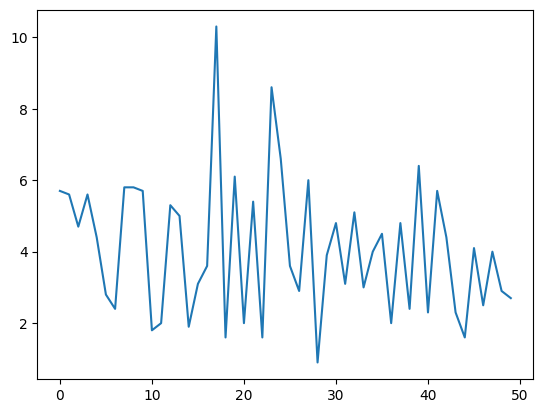

In [ ]:
estado["Murder.Rate"].plot.line()

<Axes: >

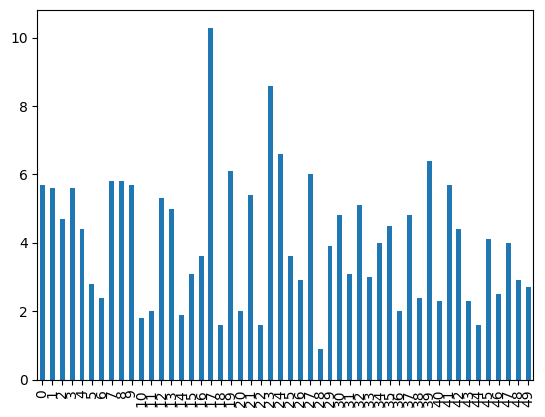

In [ ]:
estado["Murder.Rate"].plot.bar()

<Axes: >

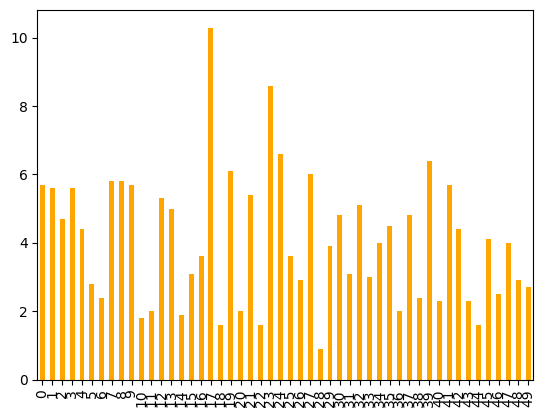

In [ ]:
estado["Murder.Rate"].plot.bar(color="orange")

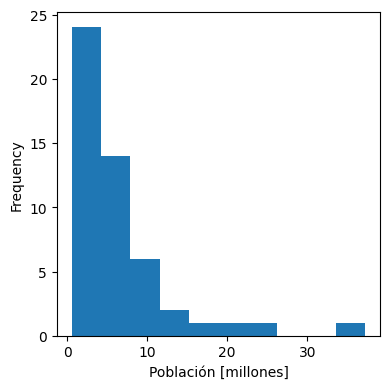

In [ ]:
ax=(estado.Population/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel("Población [millones]")

plt.tight_layout()
plt.show()

In [ ]:
estado.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

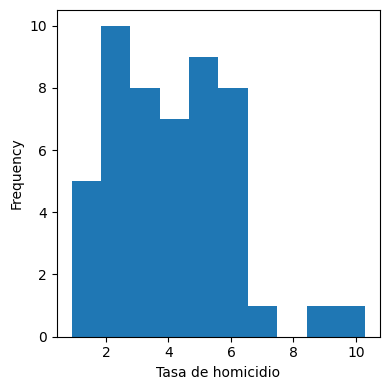

In [ ]:
ax=(estado["Murder.Rate"]).plot.hist(figsize=(4,4))
ax.set_xlabel("Tasa de homicidio")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an 

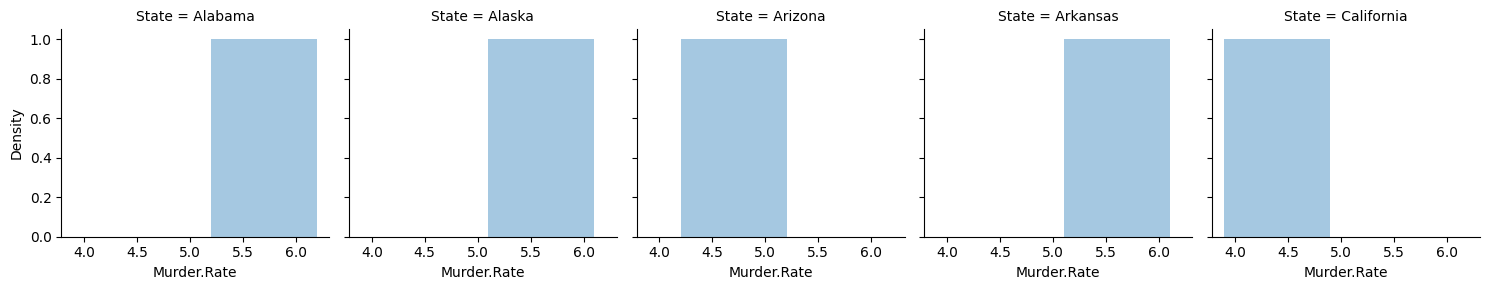

In [ ]:
analisis=estado.head()
g=sns.FacetGrid(analisis,col="State")
g.map(sns.distplot,"Murder.Rate")

#ESTIMACIÓN DE LA VARIABILIDAD
Mide el grado de agrupación o dispersión de los valores de los datos.

##Términos claves de métricas de variabilidad


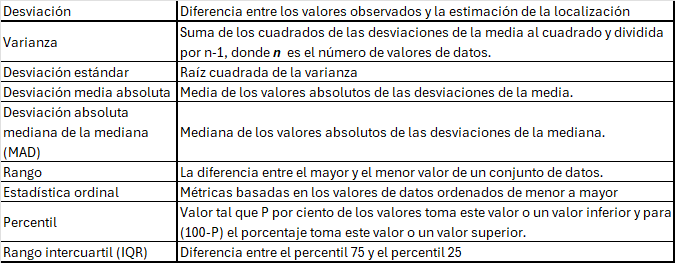

In [ ]:
#Consiguiendo el dataset directamente desde google drive. Para ello,
#se debe dar permisos a colab de ingresar a google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Para este caso, se cargarán los datos desde google drive, por lo cual aconsejo crear una carpeta en Colab Notebooks en donde se ubicarán los datasets de trabajo. En mi caso, mi carpeta se llama ciencia de datos.

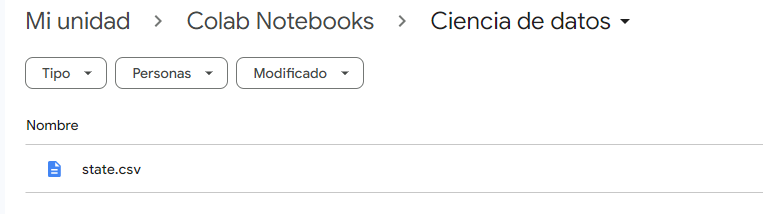

Una vez realizada la activación de google drive, se debe ubicar la carpeta y copiar la ubicación del dataset
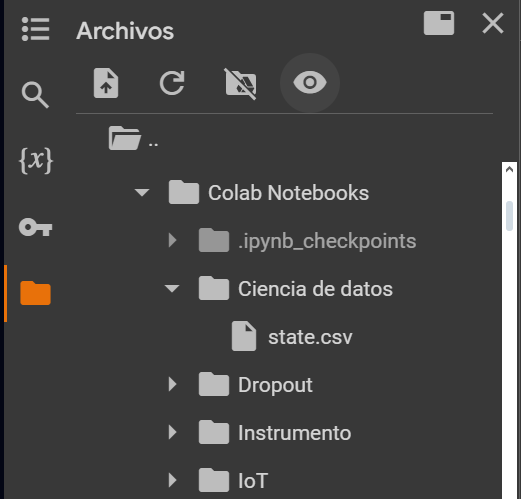

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ciencia de datos/state.csv")

In [ ]:
data.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [ ]:
#Generando cálculos de desviación estándar y cuantiles
data["Population"].std()

6848235.347401142

In [ ]:
#Calculando IQR
data.Population.quantile(0.75)-data.Population.quantile(0.25)

4847308.0

In [ ]:
robust.scale.mad(data["Population"])

3849876.1459979336

La desviación estándar es casi dos veces mayor que la MAD (*desviación absoluta mediana de la mediana*).

#EXPLORACIÓN EN LA DISTRIBUCIÓN DE DATOS

En este apartado se explorará:
###1. Diagrama de caja: Visibilización rápida de la distribución de datos.
###2. Diagrama de frecuencias: Registro de recuento de valores de datos numéricos que caen en un conjunto de intervalos.
###3. Histograma: Diagrama de la tabla de frecuencias con los intervalos en el eje x y el recuento (o proporción) en el eje y.
###4. Diagrama de densidad: Versión suavizada del histograma. A menudo basada en una **estimación de la densidad del núcleo (kernel density estimate**).

In [ ]:
#Calculando percentiles de la tasa de homicidios por estado
data["Murder.Rate"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

,Murder.Rate
0.05,1.600
0.25,2.425
0.50,4.000
0.75,5.550
0.95,6.510


Text(0, 0.5, 'Población en millones')

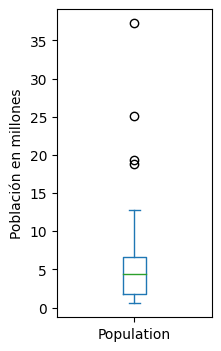

In [ ]:
#Dibujando diagramas de caja
ax = (data.Population/1_000_000).plot.box(figsize=(2,4))
ax.set_ylabel("Población en millones")

In [ ]:
#Calculando la tabla de frecuencias e histogramas
binnedPopulation=pd.cut(data["Population"],10)
binnedPopulation.value_counts()

,count
Population,
"(526935.67, 4232659.0]",24
"(4232659.0, 7901692.0]",14
"(7901692.0, 11570725.0]",6
"(11570725.0, 15239758.0]",2
"(15239758.0, 18908791.0]",1
"(18908791.0, 22577824.0]",1
"(22577824.0, 26246857.0]",1
"(33584923.0, 37253956.0]",1
"(26246857.0, 29915890.0]",0


Text(0, 0.5, 'Población en millones')

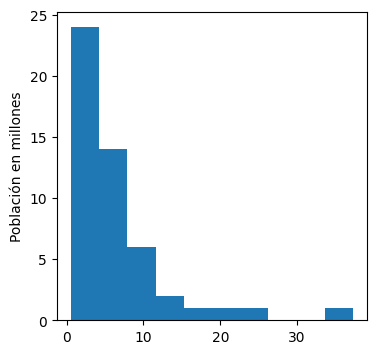

In [ ]:
#Histograma de población por estados:
ax = (data.Population/1_000_000).plot.hist(figsize=(4,4))
ax.set_ylabel("Población en millones")

Text(0.5, 0, 'Tasa de asesinatos por 1000000 habitantes')

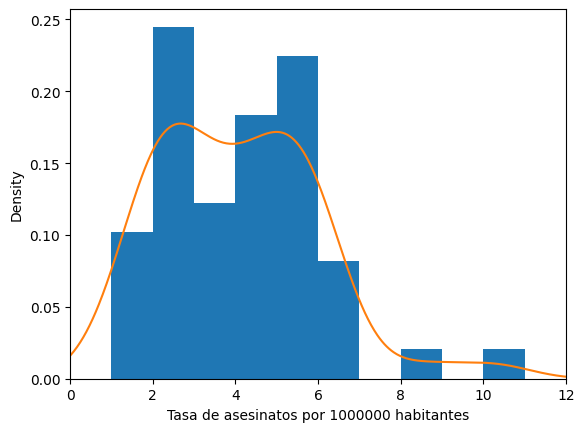

In [ ]:
#Diagrama de dispersión y curva de densidad
ax=data["Murder.Rate"].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
data["Murder.Rate"].plot.density(ax=ax)
ax.set_xlabel("Tasa de asesinatos por 1000000 habitantes")

#ACTIVIDAD

##1. Calcule las mismas métricas en su propio dataset.
##2. Responda las siguientes preguntas.

### Sobre Estimaciones de variabilidad
1.   Qué significa que la desviación estándar es casi dos veces mayor que la MAD?
2. Cómo puedo mejorar esta situación?
3. Explique el resultado obtenido al calcular IQR

### Sobre exploración en distribución de datos
1. Qué información nos suministra los percentiles de tasa de homicidios por estados?
2. Explique con sus propias palabras qué ionformación suministra el diagrama de caja con respecto a la tasa de homicidios por estado.
3. Cómo podría agregarse los estados que se encuentran en cada uno de los intervalos? Si no sabe la respuesta, complete la tabla de forma manual y postee su respuesta. Interprete los resultados obtenidos.
4. Explique el resultado obtenido por el diagrama de dispersión.

##Nota:
El resultado de ambos ejercicios debe ser subido a GitHub


1.

In [15]:
datos1=pd.read_excel("/content/Base de Datos de Compañia Celular_ESTUDIANTES (1).xlsx")

In [16]:
datos1.head()

,Precio plan,Plan internacional,plan correo de voz,número de email,minutos uso whatssapp en el dia,número de llamadas en el día,total minutos llamadas día,total minutos mensual,minutos uso redes sociales,minutos tomando fotos con el celular día,minutos uso whatssapp en la noche,total minutos llamadas noche,minutos tomando fotos con el celular noche,total video llamadas dia,total llamadas internacionales por whatssapp,minutos mensajes de texto,número llamadas atención al cliente mensual,ha cancelado el plan de teléfono
0,128,no,si,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,107,no,si,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,84,si,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,75,si,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


<Axes: >

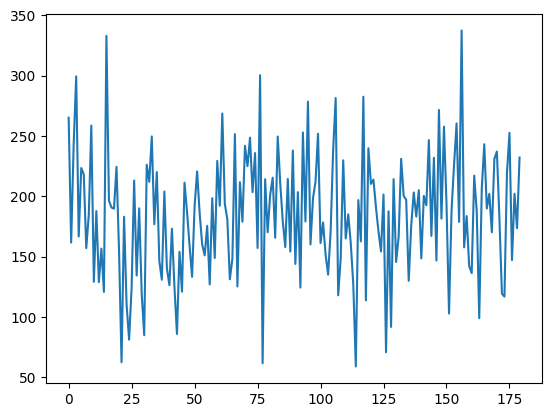

In [17]:
datos1["minutos uso whatssapp en el dia"].plot.line()

<Axes: >

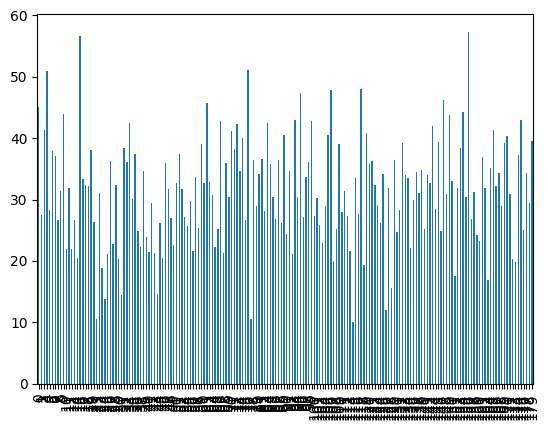

In [18]:
datos1["total minutos llamadas día"].plot.bar()

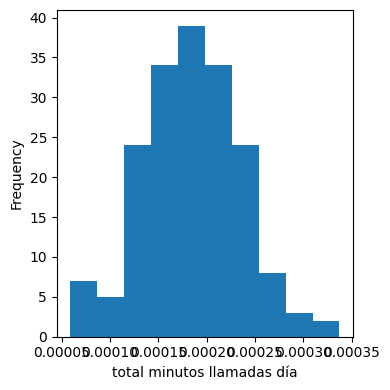

In [19]:
ax=(datos1["minutos uso whatssapp en el dia"]/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel("total minutos llamadas día")


plt.tight_layout()
plt.show()

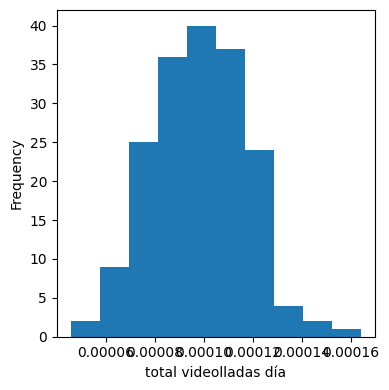

In [20]:
ax=(datos1["minutos uso redes sociales"]/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel("total videolladas día")


plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figur

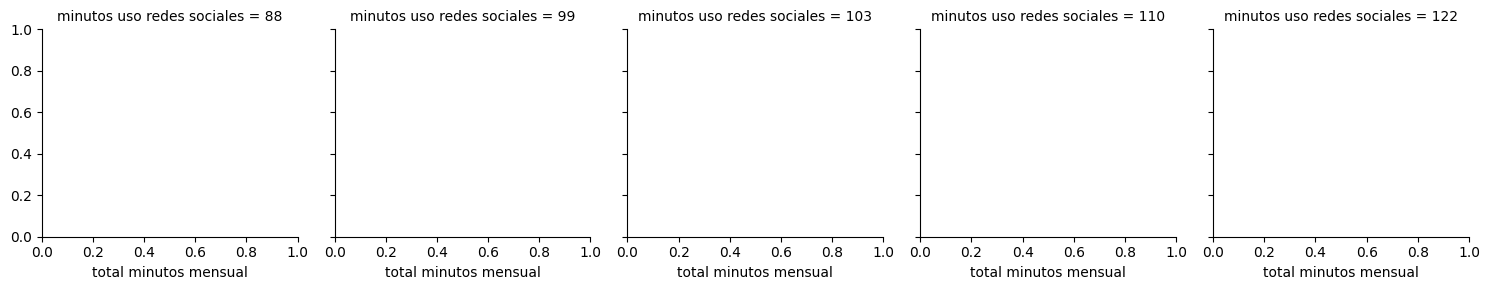

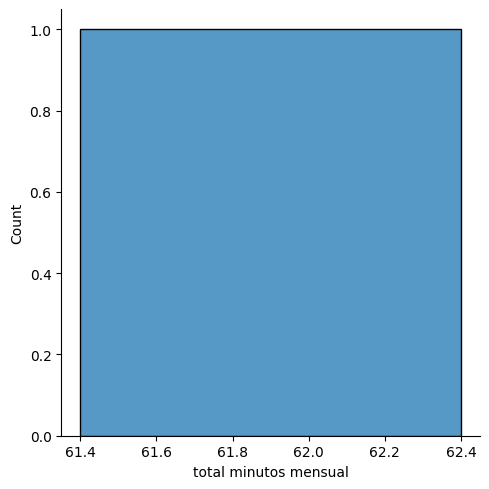

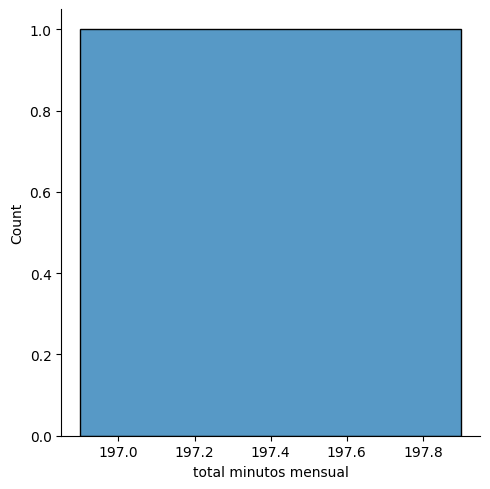

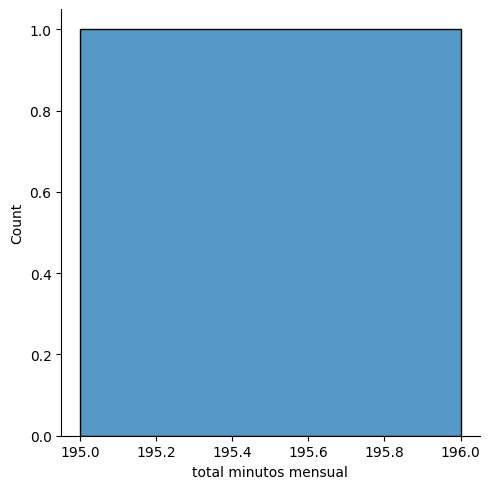

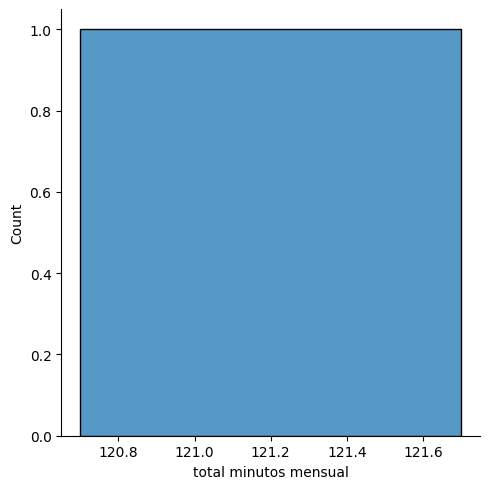

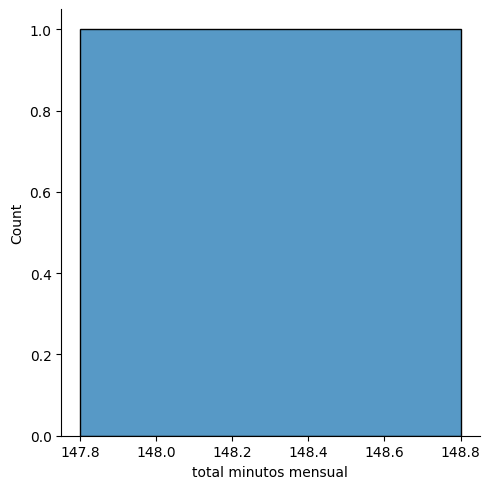

In [21]:
analisis=datos1.head()
g=sns.FacetGrid(analisis,col="minutos uso redes sociales")
g.map(sns.displot,"total minutos mensual")

Text(0, 0.5, 'total videolladas día')

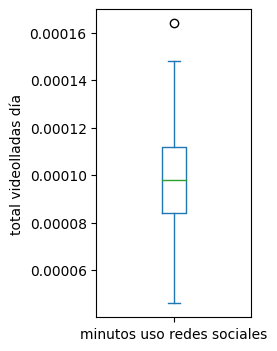

In [28]:
#Dibujando diagramas de caja
ax = (datos1["minutos uso redes sociales"] / 1_000_000).plot.box(figsize=(2,4))
ax.set_ylabel("total videolladas día")

In [30]:
datos1["total minutos mensual"].mean()

196.13222222222223

In [31]:
datos1.tail(3)

,Precio plan,Plan internacional,plan correo de voz,número de email,minutos uso whatssapp en el dia,número de llamadas en el día,total minutos llamadas día,total minutos mensual,minutos uso redes sociales,minutos tomando fotos con el celular día,minutos uso whatssapp en la noche,total minutos llamadas noche,minutos tomando fotos con el celular noche,total video llamadas dia,total llamadas internacionales por whatssapp,minutos mensajes de texto,número llamadas atención al cliente mensual,ha cancelado el plan de teléfono
177,127,no,no,0,202.1,103,34.36,229.4,86,19.50,195.2,113,8.78,11.5,3,3.11,2,no
178,116,no,no,0,173.5,93,29.50,194.1,76,16.50,208.0,112,9.36,16.2,10,4.37,3,no
179,70,no,no,0,232.1,122,39.46,292.3,112,24.85,201.2,112,9.05,0.0,0,0.00,3,no


In [38]:
datos1["número de llamadas en el día"].median()

101.5

In [39]:
datos1.describe()

,Precio plan,número de email,minutos uso whatssapp en el dia,número de llamadas en el día,total minutos llamadas día,total minutos mensual,minutos uso redes sociales,minutos tomando fotos con el celular día,minutos uso whatssapp en la noche,total minutos llamadas noche,minutos tomando fotos con el celular noche,total video llamadas dia,total llamadas internacionales por whatssapp,minutos mensajes de texto,número llamadas atención al cliente mensual
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,100.127778,7.900000,184.541111,101.161111,31.372667,196.132222,98.044444,16.671556,197.905000,99.866667,8.905889,10.309444,4.605556,2.784278,1.677778
std,38.945318,13.928829,51.174183,19.025465,8.699811,51.591120,19.625210,4.384984,52.132255,21.017524,2.346075,2.748726,2.459725,0.741848,1.323005
min,6.000000,0.000000,58.900000,47.000000,10.010000,31.200000,46.000000,2.650000,57.500000,53.000000,2.590000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,150.450000,90.000000,25.577500,163.200000,84.000000,13.872500,162.975000,86.000000,7.335000,8.500000,3.000000,2.300000,1.000000
50%,96.500000,0.000000,185.550000,101.500000,31.545000,195.250000,98.000000,16.600000,195.200000,102.000000,8.780000,10.300000,4.000000,2.780000,1.000000
75%,128.500000,21.000000,215.825000,115.000000,36.692500,223.550000,112.000000,19.002500,238.475000,115.000000,10.732500,12.100000,6.000000,3.270000,3.000000
max,193.000000,46.000000,337.400000,151.000000,57.360000,351.600000,164.000000,29.890000,326.400000,150.000000,14.690000,20.000000,19.000000,5.400000,5.000000


In [41]:
datos1.columns

Index(['Precio plan', 'Plan internacional', 'plan correo de voz',
       'número de email', 'minutos uso whatssapp en el dia',
       'número de llamadas en el día', 'total minutos llamadas día',
       'total minutos mensual', 'minutos uso redes sociales',
       'minutos tomando fotos con el celular día',
       'minutos uso whatssapp en la noche', 'total minutos llamadas noche',
       'minutos tomando fotos con el celular noche',
       'total video llamadas dia',
       'total llamadas internacionales por whatssapp',
       'minutos mensajes de texto',
       'número llamadas atención al cliente mensual',
       'ha cancelado el plan de teléfono'],
      dtype='object')

In [43]:
np.average(datos1["minutos uso whatssapp en la noche"], weights=datos1["minutos uso whatssapp en la noche"])

211.56141723441945

In [46]:
# Assuming 'wquantiles' and 'datos1' are defined and 'minutos uso whatssapp en la noche' is a valid column name
wquantiles.median(datos1['minutos uso whatssapp en la noche'], weights=datos1['minutos uso whatssapp en la noche'])

209.1010513739546

Sobre Estimaciones de variabilidad
1. Qué significa que la desviación estándar es casi dos veces mayor que la MAD?

si la desviación estándar es casi el doble de la MAD, sugiere que los datos pueden tener valores extremos que afectan la dispersión, haciendo que la desviación estándar sea más grande en comparación con la MAD, que es más robusta frente a estos valores atípicos.
2. Cómo puedo mejorar esta situación?

Transformaciones como la logaritmica, raíz cuadrada, o Box-Cox pueden reducir el impacto de los valores extremos y hacer que la distribución sea más simétrica, lo que ayudará a reducir la diferencia entre la desviación estándar y la MAD.

3. Explique el resultado obtenido al calcular IQR

representa la distancia entre el tercer cuartil Q3 y el primer cuartil Q1. Es decir, abarca el rango donde se encuentra el 50% central de los datos. Además Como el IQR solo se basa en los cuartiles, no se ve afectado por los outliers o los valores extremos. Si el IQR es pequeño en relación con el rango total de los datos, eso puede indicar que los outliers están ampliando el rango general, pero no afectan el rango central.

Sobre exploración en distribución de datos:

1. Qué información nos suministra los percentiles de tasa de homicidios por estados?

Nos indican que la mayoría de los estados tienen tasas de homicidios relativamente bajas alrededor de 4, pero hay algunos con tasas mucho más altas, lo que crea una diferencia significativa entre los estados con menores y mayores tasas.
2. Explique con sus propias palabras qué ionformación suministra el diagrama de caja con respecto a la tasa de homicidios por estado.

 la distancia entre el 25% (Q1) y el 75% (Q3). En este caso, el IQR está entre 2.425 y 5.55. Además la mediana valor de 4.000, lo que significa que la mitad de los estados tienen tasas de homicidios menores a este valor. Lo que nos muestra el diagrama de cja como tal es  la dispersión de la tasa de homicidios, destacando los valores centrales y posibles estados con tasas fuera del promedio.


3. Cómo podría agregarse los estados que se encuentran en cada uno de los intervalos? Si no sabe la respuesta, complete la tabla de forma manual y postee su respuesta.

Min-Q1 (0.9 a 2.425): Estados con tasas de homicidios más bajas, probablemente más seguros.
Q1-Mediana (2.425 a 4.000): Estados con tasas de homicidios moderadamente bajas.
Mediana-Q3 (4.000 a 5.550): Estados con tasas moderadas de homicidios.
Q3-Max (5.550 a 10.3): Estados con tasas de homicidios más altas.

4. Interprete los resultados obtenidos.
Explique el resultado obtenido por el diagrama de dispersión.

Los percentiles y el diagrama de caja ayudan avisualizar cómo se distribuyen las tasas de homicidios, identificar outliers y detectar si algunos estados tienen tasas particularmente altas o bajas.
Los intervalos entre percentiles pueden clasificarse en grupos de estados según su nivel de homicidios.
El diagrama de dispersión sirve para analizar cómo la población afecta o no la tasa de homicidios en los diferentes estados.